<a href="https://colab.research.google.com/github/IgorvH-Developer/ColaboratoryFailes/blob/main/BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

from google.colab import drive


In [27]:
device = torch.device("cuda")

In [28]:
import sklearn.datasets
boston = sklearn.datasets.load_boston()
boston.data.shape

(506, 13)

In [29]:
X_train = torch.tensor(boston.data[0:460])
y_train = torch.tensor(boston.target[0:460])
X_test = torch.tensor(boston.data[460:506])
y_test = torch.tensor(boston.target[460:506])

In [30]:
X_train.requires_grad_()
y_train.requires_grad_()
X_test.requires_grad_()
y_test.requires_grad_()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1);

In [31]:
a= X_train[:,5]
b = X_train[:,12]
c= X_test[:,5]
d = X_test[:,12]
newX_train = torch.ones(a.size(0),2)
newX_test = torch.ones(c.size(0),2)

newX_train[:,0] = a
newX_train[:,1] = b
newX_train.requires_grad_
newX_test[:,0] = c
newX_test[:,1] = d
newX_test.requires_grad_
newX_test.size()

torch.Size([46, 2])

In [32]:
y_test.size()

torch.Size([46, 1])

In [104]:
class GuessPrice(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(GuessPrice, self).__init__()
        
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    
bostonPrice_net = GuessPrice(6)

In [120]:
def loss(preds, target):
    square = ((preds - target) ** 2).mean()
    return square

optimizer = torch.optim.Adam (bostonPrice_net.parameters(), 
                             lr=0.0001)

In [121]:
batch_size = 460
loss_history = [[0,0] for i in range(50000)]

for epoch in range(50000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = bostonPrice_net.forward(x_batch.float()) 
        
        loss_value = loss(preds, y_batch)
        #print(loss_value)
        loss_value.backward()

        loss_history[epoch][0] = epoch
        loss_history[epoch][1] = loss_value.data.numpy().tolist()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = bostonPrice_net.forward(X_test.float())
        print(((test_preds - y_test) ** 2).mean())

tensor(13.9687, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.5077, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4986, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4985, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4985, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4985, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4985, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4984, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4984, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4983, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4982, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4982, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4981, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4981, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4980, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(11.4981, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1

KeyboardInterrupt: ignored

In [122]:
pr = bostonPrice_net.forward(X_test.float())
pr.size()

torch.Size([46, 1])

In [123]:
y_test.size()

torch.Size([46, 1])

In [124]:

loss(y_test,pr)

tensor(11.4985, dtype=torch.float64, grad_fn=<MeanBackward0>)

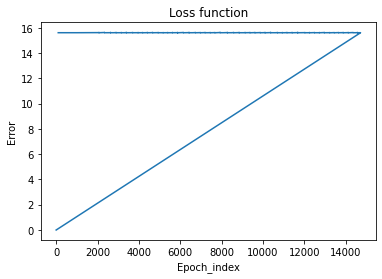

In [132]:
plt.plot([row[0] for row in loss_history][100:], [row[1] for row in loss_history][100:])
plt.title(label='Loss function')
plt.xlabel('Epoch_index')
plt.ylabel('Error');
plt.show()

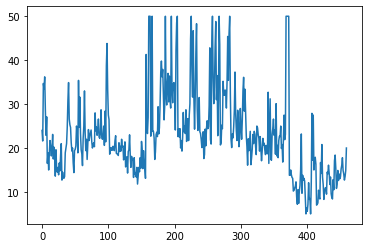

In [ ]:
x = torch.zeros(y_train.size(0),1)
for i in range(y_train.size(0)):
    x[i] = i

plt.plot(x.numpy(), y_train.detach().numpy())

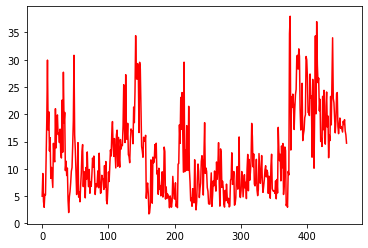

In [ ]:
plt.plot(x.numpy(), X_train[:,12].detach().numpy(),'r')